In [2]:
from pathlib import Path
import sys
import bz2

import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import orjson

sys.path.append(str(Path('../').resolve()))

from simulation.model import CommunicationNetwork

In [3]:
def load_channels(data_path):
    with open(data_path, 'rb') as file:
        d = orjson.loads(bz2.decompress(file.read()))
    df = pd.DataFrame.from_dict(d, orient='index')
    df.start = pd.to_datetime(df.start)
    df.end = pd.to_datetime(df.end)
    df.bound = df.bound.astype('category')
    return df

In [4]:
trivago_cn = CommunicationNetwork.from_json(Path('../data/networks/trivago.json.bz2'))
spotify_cn = CommunicationNetwork.from_json(Path('../data/networks/spotify.json.bz2'))
microsoft_cn = CommunicationNetwork.from_json(Path('../data/networks/microsoft.json.bz2'))

In [5]:
communication_networks = {
    'Trivago': trivago_cn, 
    'Spotify': spotify_cn, 
    'Microsoft': microsoft_cn, 
}

In [6]:
code_review_tools = {
    'Trivago': 'BitBucket', 
    'Spotify': 'GitHub', 
    'Microsoft': 'CodeFlow'
}
classification = {
    'Trivago': 'small', 
    'Spotify': 'mid-sized', 
    'Microsoft': 'large'
}
for name, cn in communication_networks.items():
    num_channels = len(cn.channels())
    num_participants = len(cn.participants())
    print(f'{name} & {classification[name]} & \\num{{{num_channels}}} & \\num{{{num_participants}}} & {code_review_tools[name]} \\\\')

Trivago & small & \num{2442} & \num{364} & BitBucket \\
Spotify & mid-sized & \num{22504} & \num{1730} & GitHub \\
Microsoft & large & \num{309740} & \num{37103} & CodeFlow \\


In [7]:
results = []
for name, cn in communication_networks.items():
    results += [pd.DataFrame([(name, len(cn.channels(participant))) for participant in cn.participants()], columns=['name', 'num_code_reviews'])]
df = pd.concat(results).reset_index(drop=True)

In [8]:
df.sort_values('num_code_reviews', ascending=False).head(14)

,name,num_code_reviews
30801,Microsoft,8249
10154,Microsoft,7691
12762,Microsoft,6684
32309,Microsoft,2040
20085,Microsoft,1056
15555,Microsoft,1008
34337,Microsoft,630
14409,Microsoft,605
35231,Microsoft,592
24856,Microsoft,582


In [9]:
500/(20*8)

3.125

In [10]:
8249/(20*8)

51.55625

In [11]:
bounds = pd.concat([load_channels(Path(f'../data/networks/{name}.json.bz2')).bound.value_counts(normalize=True).rename(name.capitalize()) for name in ('trivago', 'spotify', 'microsoft')], axis=1)

<Axes: >

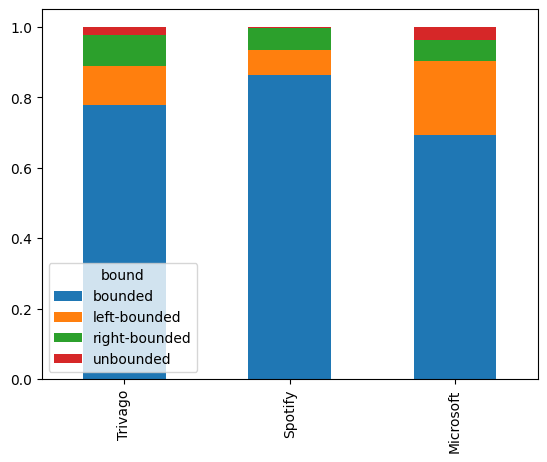

In [12]:
bounds.transpose().plot(kind='bar', stacked=True)

In [15]:
bounds.transpose().to_csv(f'../reports/csv/bounds.csv', index_label='index', float_format='%g')

In [14]:
bounds.transpose()

bound,bounded,left-bounded,right-bounded,unbounded
Trivago,0.778870,0.108927,0.089681,0.022523
Spotify,0.864780,0.070476,0.061100,0.003644
Microsoft,0.693653,0.209624,0.059130,0.037593
